# Data Evaluation
### In this section, we will try to answer a few questions with the help of the cleaned data we prepared in the Data_Preparing Notebook

In [ ]:
import io
import os
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

clean_data_path = '../Datasets/cleaned_survey_results.csv'
data = pd.read_csv(clean_data_path)
data.head(10)


## Defining new functions to help us visualize data.


In [ ]:
def plot_bar_graph(xy=None,x=None, y=None, hor=False, xlabel="", ylabel="",w=0.9, xl=None, yl=None, title="",indent=None, d={}):
    if not (x and y):
        x = list(xy.index)
        y = list(xy.values)
    x.reverse()
    y.reverse()
    for i in range(len(x)):
        x[i]=d.get(x[i], x[i])
    if(xl and yl): plt.figure(figsize=(xl, yl))
    c = np.random.rand(len(x), 3)
    if hor:
        plt.barh(x, y, color=c)
    else:
        plt.bar(x, y, color=c)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for i, v in enumerate(y):
        plt.text(v, i, " "+str(v)+" ", va="center", ha="right" if(indent and v>indent) else "left")

## 1. Age of developers.

In [ ]:
Age_Ranges = data["Age"].value_counts()
plot_bar_graph(
    xy=Age_Ranges,
    hor=True,
    indent=30000,
    xlabel="Count of developers",
    title="Age of Developers"
)

## 2. Demographics of developers

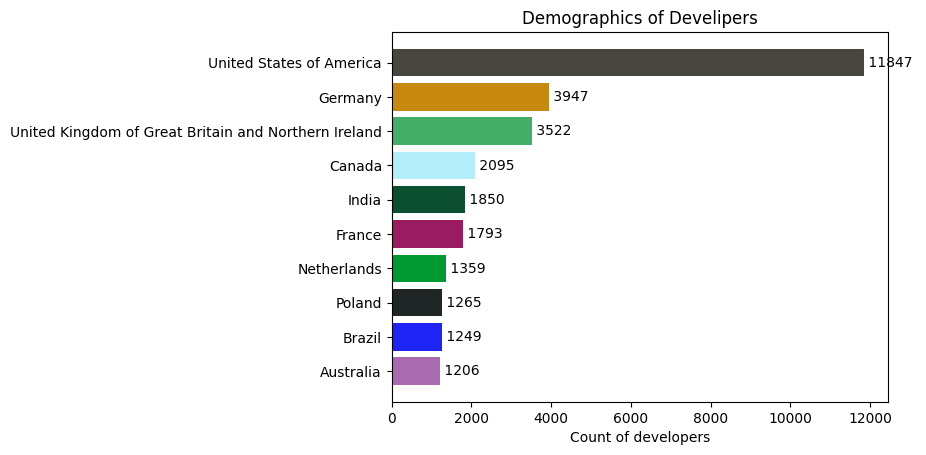

In [47]:
Countries = data["Country"].value_counts().sort_values(ascending=False).head(10)
plot_bar_graph(
    xy= Countries,
    hor=True,
    indent=30000,
    xlabel="Count of developers",
    title="Demographics of Develipers"
)

## 3. Work Culture Analysis

In [ ]:
rw = data["RemoteWork"].value_counts()
plt.figure(figsize=(10, 6))

sns.barplot(x=rw.index, y=rw.values, palette='viridis')

plt.title("Work Culture: Remote, In-Person, or Hybrid")
plt.xlabel("Work Culture")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Programming languages and average yearly compensation.

In [ ]:
languages = data.assign(LanguageHaveWorkedWith=data['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')

# Group by LanguageHaveWorkedWith and calculate the average ConvertedCompYearly
language_analysis = languages.groupby('LanguageHaveWorkedWith')['ConvertedCompYearly'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=language_analysis, x='LanguageHaveWorkedWith', y='ConvertedCompYearly', palette='viridis')
plt.title('Average Yearly Compensation by Programming Language')
plt.xlabel('Programming Language')
plt.ylabel('Average Yearly Compensation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 5. Programming Language Used by Developers

In [ ]:
LCO = dict(data["LanguageHaveWorkedWith"].value_counts())
l=data["LanguageHaveWorkedWith"].shape[0]
d={}
for i, v in list(LCO.items()):
    for j in list(i.split(";")):
        d[j]=d.get(j, 0)+v
        
plot_bar_graph(
    x=list(d.keys()),
    y=list(d.values()),
    hor=True,xl=12, yl=30,
    indent=50000,
    title="Programming languages used by devs",
    xlabel="developers count",
    d={"Formal documentation provided by the owner of the tech":"Documentation by Tech owner", "Online challenges (e.g., daily or weekly coding challenges)":"Online Challenges"}
)

## 6. Distribution of Education Levels of Developers

In [ ]:
data['EdLevel'].value_counts().sort_values().plot(kind='barh')

plt.title('Distribution of Respondents by Education Level')

## 7. Yearly Compensation for the Database and Platform used by developers

In [ ]:
# Split the DatabaseHaveWorkedWith column into multiple rows
databases = data.assign(DatabaseHaveWorkedWith=data['DatabaseHaveWorkedWith'].str.split(';')).explode('DatabaseHaveWorkedWith')

compensation_by_database = databases.groupby('DatabaseHaveWorkedWith')['ConvertedCompYearly'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=compensation_by_database, x='DatabaseHaveWorkedWith', y='ConvertedCompYearly', palette='viridis')
plt.title('Average Yearly Compensation by Database')
plt.xlabel('Database')
plt.ylabel('Average Yearly Compensation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Split the PlatformHaveWorkedWith column into multiple rows
platforms = data.assign(PlatformHaveWorkedWith=data['PlatformHaveWorkedWith'].str.split(';')).explode('PlatformHaveWorkedWith')

# Group by PlatformHaveWorkedWith and calculate the average ConvertedCompYearly
compensation_by_platform = platforms.groupby('PlatformHaveWorkedWith')['ConvertedCompYearly'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=compensation_by_platform, x='PlatformHaveWorkedWith', y='ConvertedCompYearly', palette='viridis')
plt.title('Average Yearly Compensation by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Yearly Compensation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()